# Analyse Exploratoire

### Import des modules

In [831]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import joblib
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


### Analyse Exploratoire

In [832]:

df_eval = pd.read_csv("../data/extrait_eval.csv")

In [833]:
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
memory usage:

In [834]:
df_sirh = pd.read_csv("../data/extrait_sirh.csv")
df_sirh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


In [835]:
df_sondage = pd.read_csv("../data/extrait_sondage.csv")
df_sondage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

### Jointure

In [836]:
# Jointure

df_eval['id_employee'] = df_eval['eval_number'].str.extract(r'E_(\d+)').astype(int)
df1 = pd.merge(df_sirh, df_sondage, left_on='id_employee', right_on='code_sondage')
df = pd.merge(df1, df_eval, on='id_employee')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   id_employee                                1470 non-null   int64 
 1   age                                        1470 non-null   int64 
 2   genre                                      1470 non-null   object
 3   revenu_mensuel                             1470 non-null   int64 
 4   statut_marital                             1470 non-null   object
 5   departement                                1470 non-null   object
 6   poste                                      1470 non-null   object
 7   nombre_experiences_precedentes             1470 non-null   int64 
 8   nombre_heures_travailless                  1470 non-null   int64 
 9   annee_experience_totale                    1470 non-null   int64 
 10  annees_dans_l_entreprise            

In [837]:
missing = df.isna().sum()
total_missing = missing.sum() 

print(f"Nombre total de valeurs manquantes : {total_missing}")

Nombre total de valeurs manquantes : 0


In [838]:
# Colonnes non numériques
non_num_cols = df.select_dtypes(exclude=['number']).columns
print("Colonnes non numériques :")
print(non_num_cols.tolist())


Colonnes non numériques :
['genre', 'statut_marital', 'departement', 'poste', 'a_quitte_l_entreprise', 'domaine_etude', 'ayant_enfants', 'frequence_deplacement', 'eval_number', 'heure_supplementaires', 'augementation_salaire_precedente']


In [839]:
cols = ['genre', 'statut_marital', 'departement', 'poste', 
        'a_quitte_l_entreprise', 'domaine_etude', 'ayant_enfants', 
        'frequence_deplacement', 'eval_number', 
        'heure_supplementaires', 'augementation_salaire_precedente']

for col in cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False).head(10)) 


--- genre ---
genre
M    882
F    588
Name: count, dtype: int64

--- statut_marital ---
statut_marital
Marié(e)       673
Célibataire    470
Divorcé(e)     327
Name: count, dtype: int64

--- departement ---
departement
Consulting             961
Commercial             446
Ressources Humaines     63
Name: count, dtype: int64

--- poste ---
poste
Cadre Commercial           326
Assistant de Direction     292
Consultant                 259
Tech Lead                  145
Manager                    131
Senior Manager             102
Représentant Commercial     83
Directeur Technique         80
Ressources Humaines         52
Name: count, dtype: int64

--- a_quitte_l_entreprise ---
a_quitte_l_entreprise
Non    1233
Oui     237
Name: count, dtype: int64

--- domaine_etude ---
domaine_etude
Infra & Cloud              606
Transformation Digitale    464
Marketing                  159
Entrepreunariat            132
Autre                       82
Ressources Humaines         27
Name: count, dtype: i

### Transformation

In [840]:
df['a_quitte_l_entreprise'] = df['a_quitte_l_entreprise'].apply(lambda x: 1 if x == "Oui" else 0)

# 📊 Les stats descriptives

### 📊 Distribution

### Distribution de l'age

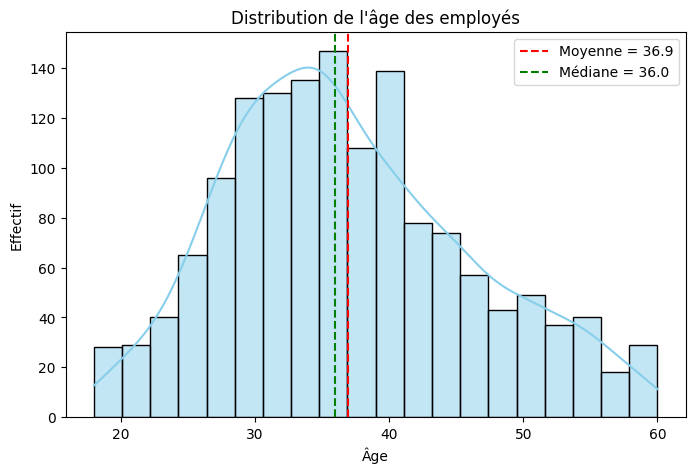

In [841]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color="skyblue")
plt.axvline(df['age'].mean(), color='red', linestyle='--', label=f"Moyenne = {df['age'].mean():.1f}")
plt.axvline(df['age'].median(), color='green', linestyle='--', label=f"Médiane = {df['age'].median():.1f}")
plt.title("Distribution de l'âge des employés")
plt.xlabel("Âge")
plt.ylabel("Effectif")
plt.legend()
plt.show()

### Répartition du genre

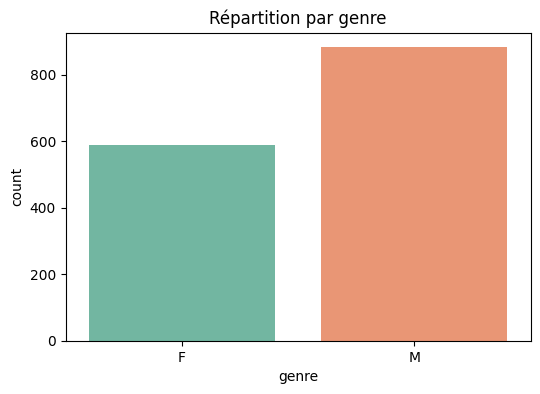

In [842]:
plt.figure(figsize=(6,4))
sns.countplot(x='genre', data=df, palette="Set2")
plt.title("Répartition par genre")
plt.show()

### Distribution du revenu mensuel

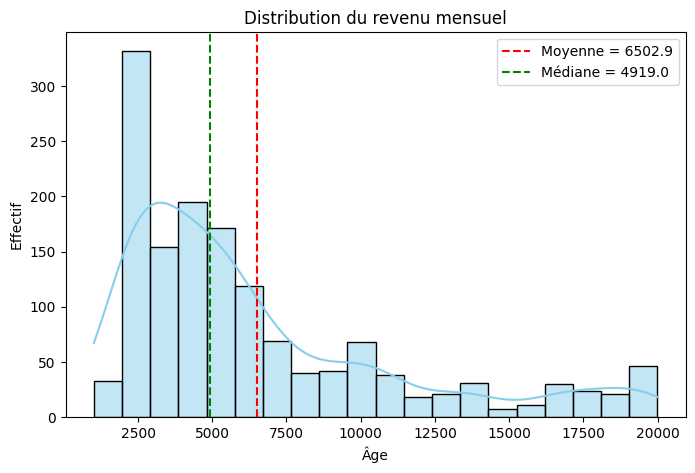

In [843]:
plt.figure(figsize=(8,5))
sns.histplot(df['revenu_mensuel'], bins=20, kde=True, color="skyblue")
plt.axvline(df['revenu_mensuel'].mean(), color='red', linestyle='--', label=f"Moyenne = {df['revenu_mensuel'].mean():.1f}")
plt.axvline(df['revenu_mensuel'].median(), color='green', linestyle='--', label=f"Médiane = {df['revenu_mensuel'].median():.1f}")
plt.title("Distribution du revenu mensuel")
plt.xlabel("Âge")
plt.ylabel("Effectif")
plt.legend()
plt.show()

### Distribution heures travailles

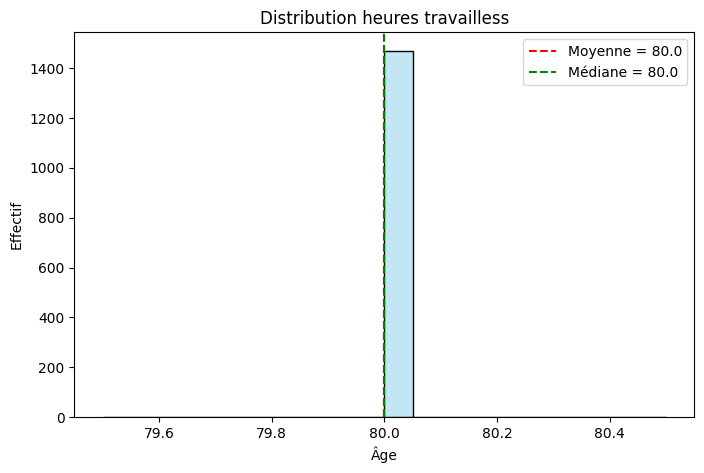

nombre_heures_travailless
80    1470
Name: count, dtype: int64

In [844]:
plt.figure(figsize=(8,5))
sns.histplot(df['nombre_heures_travailless'], bins=20, kde=True, color="skyblue")
plt.axvline(df['nombre_heures_travailless'].mean(), color='red', linestyle='--', label=f"Moyenne = {df['nombre_heures_travailless'].mean():.1f}")
plt.axvline(df['nombre_heures_travailless'].median(), color='green', linestyle='--', label=f"Médiane = {df['nombre_heures_travailless'].median():.1f}")
plt.title("Distribution heures travailless")
plt.xlabel("Âge")
plt.ylabel("Effectif")
plt.legend()
plt.show()

df['nombre_heures_travailless'].value_counts()

### Distribution Années dans l'entreprise

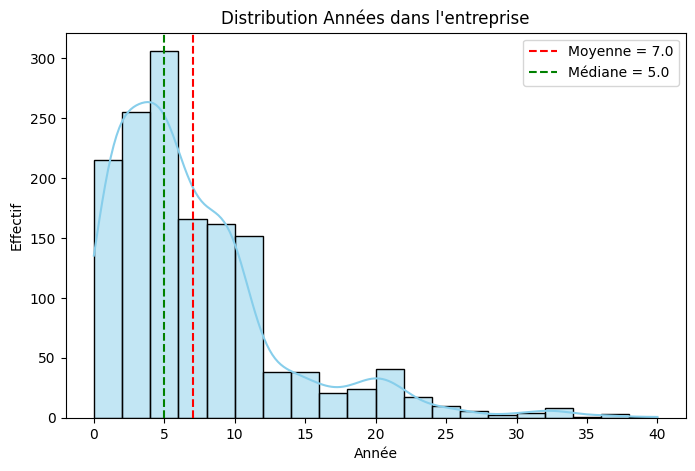

In [845]:
plt.figure(figsize=(8,5))
sns.histplot(df['annees_dans_l_entreprise'], bins=20, kde=True, color="skyblue")
plt.axvline(df['annees_dans_l_entreprise'].mean(), color='red', linestyle='--', label=f"Moyenne = {df['annees_dans_l_entreprise'].mean():.1f}")
plt.axvline(df['annees_dans_l_entreprise'].median(), color='green', linestyle='--', label=f"Médiane = {df['annees_dans_l_entreprise'].median():.1f}")
plt.title("Distribution Années dans l'entreprise")
plt.xlabel("Année")
plt.ylabel("Effectif")
plt.legend()
plt.show()


### Distribution Quitter entreprise

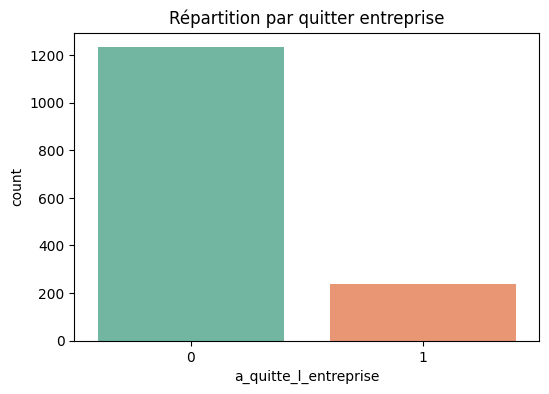

In [846]:
plt.figure(figsize=(6,4))
sns.countplot(x='a_quitte_l_entreprise', data=df, palette="Set2")
plt.title("Répartition par quitter entreprise")
plt.show()

### 📊 Comparatives

### Taux de départ par département

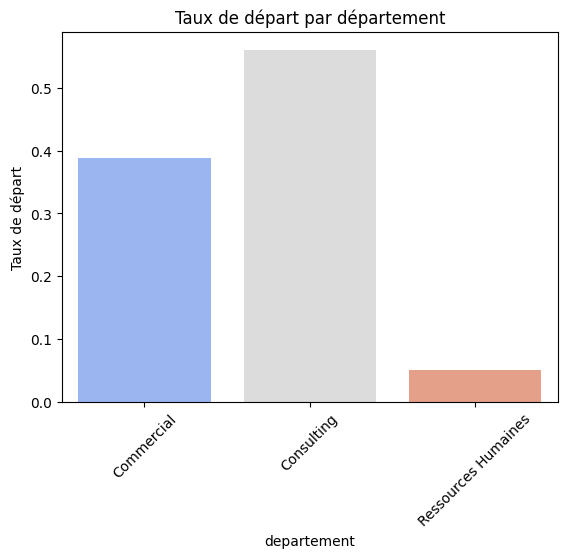

In [847]:
depart_counts = df.groupby('departement')['a_quitte_l_entreprise'].sum()
taux_depart = depart_counts / depart_counts.sum() 

sns.barplot(x=taux_depart.index, y=taux_depart.values, palette='coolwarm')
plt.title("Taux de départ par département")
plt.ylabel("Taux de départ")
plt.xticks(rotation=45)
plt.show()


> **Interprétation :**  
> Parmi tous ceux qui quittent l’entreprise, quelle proportion vient de chaque département ?


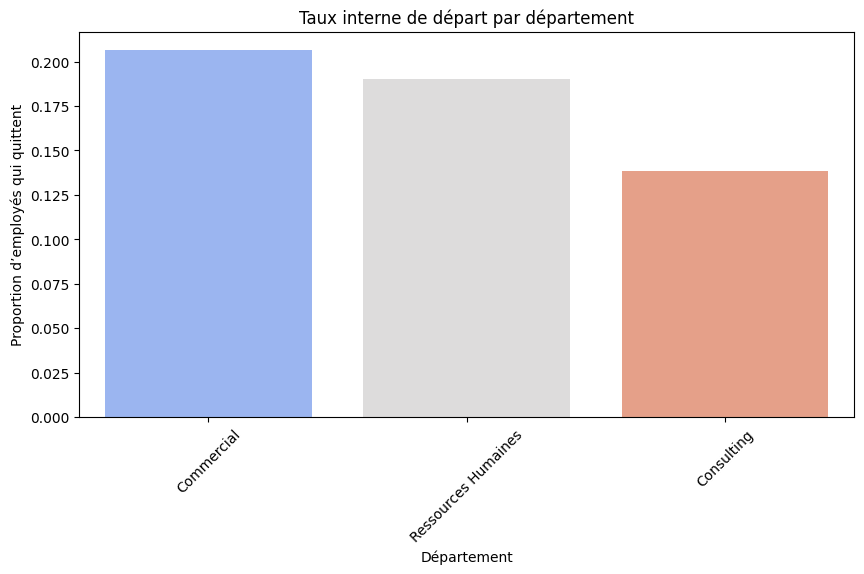

In [848]:
depart_counts = df.groupby('departement')['a_quitte_l_entreprise'].sum()

effectif_departement = df['departement'].value_counts()

taux_depart_interne = depart_counts / effectif_departement

taux_depart_interne = taux_depart_interne.sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=taux_depart_interne.index, y=taux_depart_interne.values, palette="coolwarm")
plt.title("Taux interne de départ par département")
plt.ylabel("Proportion d’employés qui quittent")
plt.xlabel("Département")
plt.xticks(rotation=45)
plt.show()


> **Interprétation :**  
> Si je prends un employé de ce département, quelle est la probabilité qu’il ait quitté l’entreprise ?


### Taux de départ par poste

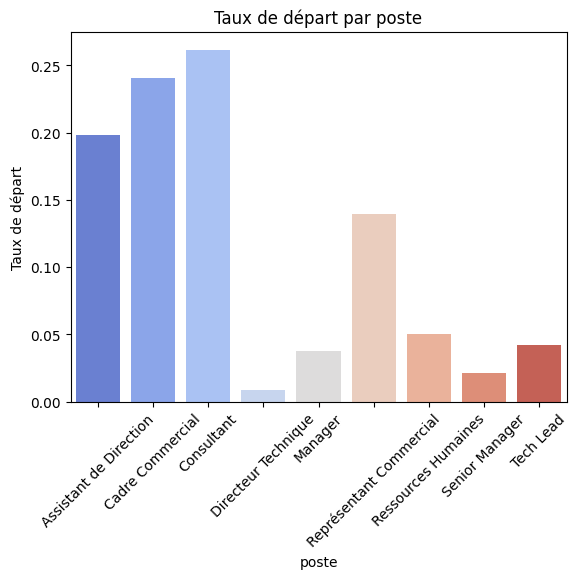

In [849]:
depart_counts = df.groupby('poste')['a_quitte_l_entreprise'].sum()
taux_depart = depart_counts / depart_counts.sum() 

sns.barplot(x=taux_depart.index, y=taux_depart.values, palette='coolwarm')
plt.title("Taux de départ par poste")
plt.ylabel("Taux de départ")
plt.xticks(rotation=45)
plt.show()

> **Interprétation :**  
> Parmi tous ceux qui ont quitté l’entreprise, quelle proportion occupait ce poste ?


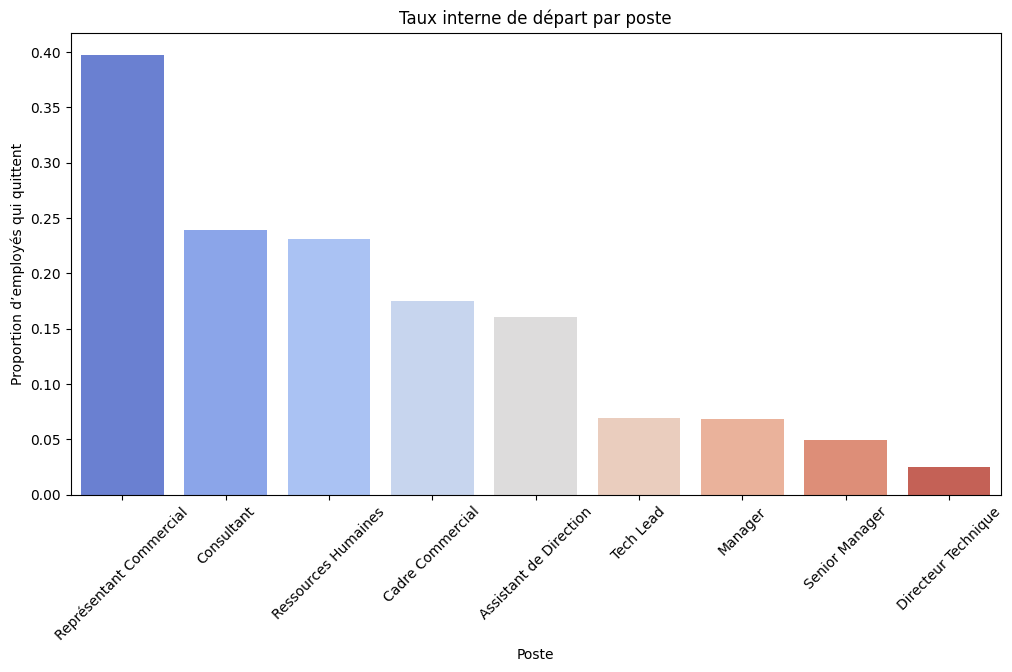

In [850]:
depart_counts = df.groupby('poste')['a_quitte_l_entreprise'].sum()

effectif_poste = df['poste'].value_counts()

taux_depart_interne = depart_counts / effectif_poste

taux_depart_interne = taux_depart_interne.sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=taux_depart_interne.index, y=taux_depart_interne.values, palette="coolwarm")
plt.title("Taux interne de départ par poste")
plt.ylabel("Proportion d’employés qui quittent")
plt.xlabel("Poste")
plt.xticks(rotation=45)
plt.show()

> **Interprétation :**  
> Si je prends un employé de ce poste, quelle est la probabilité qu’il ait quitté l’entreprise ?

### Taux de départ par genre (plus homme que femme donc normal)

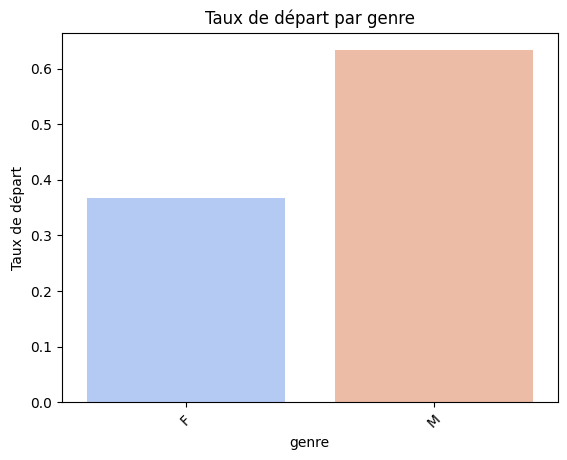

In [851]:
depart_counts = df.groupby('genre')['a_quitte_l_entreprise'].sum()


taux_depart = (depart_counts / depart_counts.sum() ) 

sns.barplot(x=taux_depart.index, y=taux_depart.values, palette='coolwarm')
plt.title("Taux de départ par genre")
plt.ylabel("Taux de départ")
plt.xticks(rotation=45)
plt.show()

### Taux de départ par distance domicile

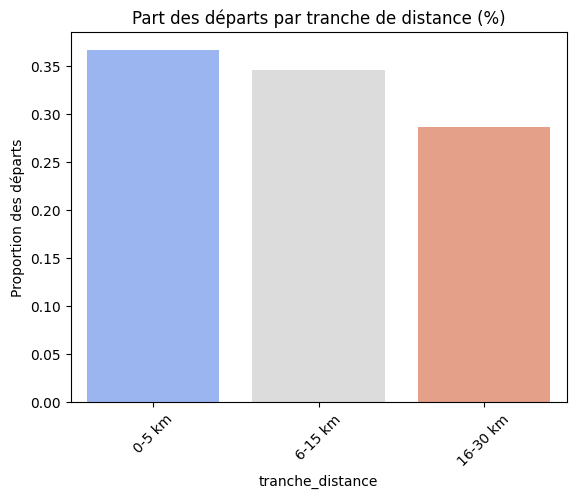

In [852]:
bins   = [0, 5, 15, 30]
labels = ['0-5 km', '6-15 km', '16-30 km']

df['tranche_distance'] = pd.cut(df['distance_domicile_travail'], bins=bins, labels=labels)

depart_counts = df.groupby('tranche_distance')['a_quitte_l_entreprise'].sum()

part_depart = depart_counts / depart_counts.sum()

sns.barplot(x=part_depart.index, y=part_depart.values, palette='coolwarm')
plt.title("Part des départs par tranche de distance (%)")
plt.ylabel("Proportion des départs")
plt.xticks(rotation=45)
plt.show()



> **Interprétation :**  
> Parmi tous ceux qui ont quitté l’entreprise, quelle proportion en fonction de la distance domicile ?


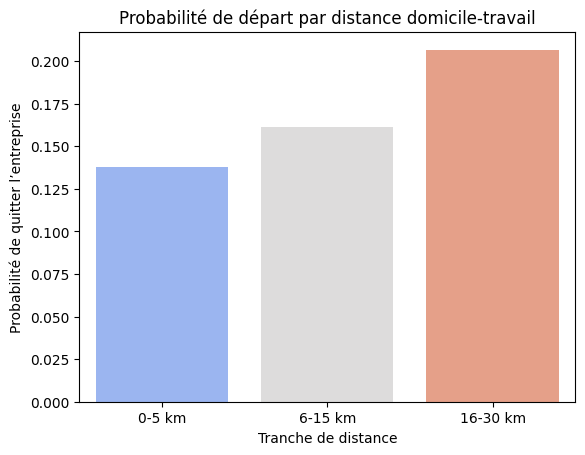

In [853]:
bins   = [0, 5, 15, 30]
labels = ['0-5 km', '6-15 km', '16-30 km']

df['tranche_distance'] = pd.cut(df['distance_domicile_travail'], bins=bins, labels=labels)

proba_depart = (
    df.groupby('tranche_distance')['a_quitte_l_entreprise']
      .mean()   
)

sns.barplot(x=proba_depart.index, y=proba_depart.values, palette='coolwarm')
plt.title("Probabilité de départ par distance domicile-travail")
plt.ylabel("Probabilité de quitter l’entreprise")
plt.xlabel("Tranche de distance")
plt.show()


> **Interprétation :**  
> Si je prends un employé en fonction de ca distance domicile, quelle est la probabilité qu’il ait quitté l’entreprise ?

### Taux de départ par tranche d'age

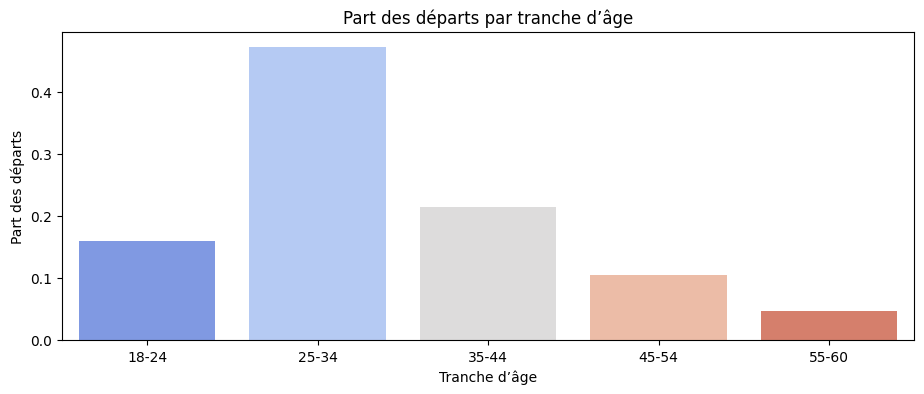

In [854]:
bins = [17, 24, 34, 44, 54, 60]  
labels = ['18-24', '25-34', '35-44', '45-54', '55-60']

df['tranche_age'] = pd.cut(df['age'], bins=bins, labels=labels)


departs_par_tranche = (
    df.groupby('tranche_age')['a_quitte_l_entreprise']
      .sum()
)

part_des_departs = departs_par_tranche / departs_par_tranche.sum()

plt.figure(figsize=(11,4))
sns.barplot(x=part_des_departs.index, y=part_des_departs.values, palette='coolwarm')
plt.title("Part des départs par tranche d’âge")
plt.ylabel("Part des départs")
plt.xlabel("Tranche d’âge")
plt.show()


> **Interprétation :**  
> Parmi tous ceux qui ont quitté l’entreprise, quelle proportion en fonction age ?


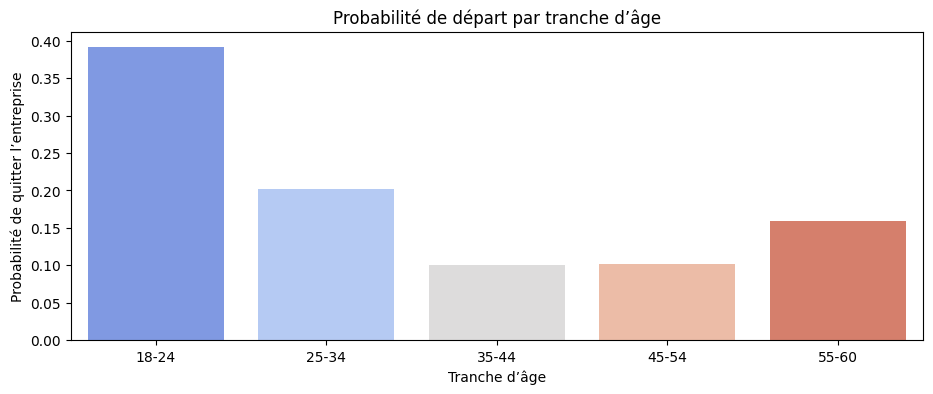

In [855]:
bins = [17, 24, 34, 44, 54, 60]
labels = ['18-24', '25-34', '35-44', '45-54', '55-60']

df['tranche_age'] = pd.cut(df['age'], bins=bins, labels=labels)

proba_departs = (
    df.groupby('tranche_age')['a_quitte_l_entreprise']
      .mean() 
)

plt.figure(figsize=(11,4))
sns.barplot(x=proba_departs.index, y=proba_departs.values, palette='coolwarm')
plt.title("Probabilité de départ par tranche d’âge")
plt.ylabel("Probabilité de quitter l’entreprise")
plt.xlabel("Tranche d’âge")
plt.show()

> **Interprétation :**  
> Si je prends un employé en fonction de son age, quelle est la probabilité qu’il ait quitté l’entreprise ?

### Taux de départ par heure sup

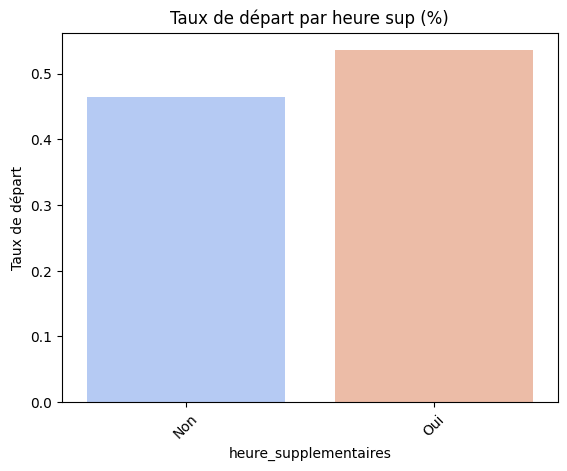

In [856]:
depart_counts = df.groupby('heure_supplementaires')['a_quitte_l_entreprise'].sum()
taux_depart = depart_counts / depart_counts.sum() 

sns.barplot(x=taux_depart.index, y=taux_depart.values, palette='coolwarm')
plt.title("Taux de départ par heure sup (%)")
plt.ylabel("Taux de départ")
plt.xticks(rotation=45)
plt.show()

> **Interprétation :**  
> Parmi tous ceux qui ont quitté l’entreprise, quelle proportion en fonction heure sup ?

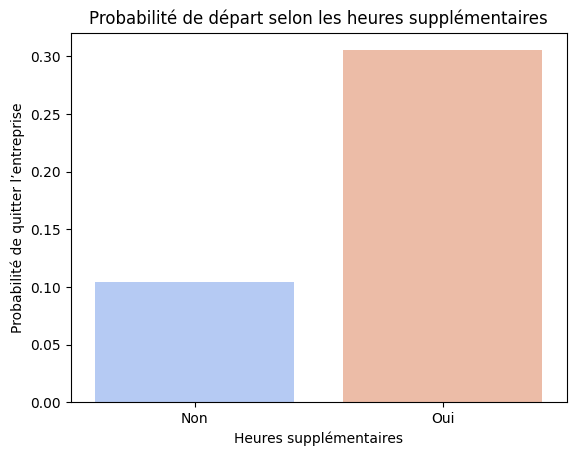

In [857]:
proba_depart_hs = (
    df.groupby('heure_supplementaires')['a_quitte_l_entreprise']
      .mean()  
)

sns.barplot(x=proba_depart_hs.index, y=proba_depart_hs.values, palette='coolwarm')
plt.title("Probabilité de départ selon les heures supplémentaires")
plt.ylabel("Probabilité de quitter l’entreprise")
plt.xlabel("Heures supplémentaires")
plt.show()

> **Interprétation :**  
> Si je prends un employé en fonction heures sup, quelle est la probabilité qu’il ait quitté l’entreprise ?

### Taux de départ par formation

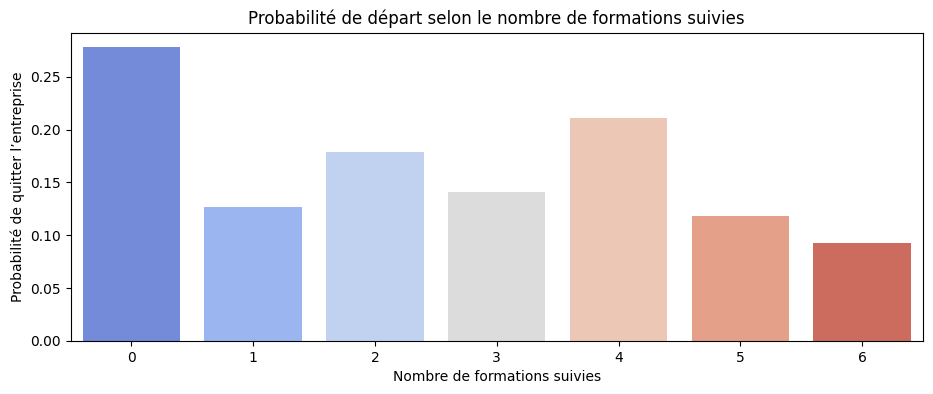

In [858]:
proba_departs = (
    df.groupby('nb_formations_suivies')['a_quitte_l_entreprise']
      .mean()
)

plt.figure(figsize=(11,4))
sns.barplot(x=proba_departs.index, y=proba_departs.values, palette='coolwarm')

plt.title("Probabilité de départ selon le nombre de formations suivies")
plt.ylabel("Probabilité de quitter l’entreprise")
plt.xlabel("Nombre de formations suivies")
plt.show()


> **Interprétation :**  
> Si je prends un employé en fonction nb formation, quelle est la probabilité qu’il ait quitté l’entreprise ?

### Taux de départ par nb exp précedente

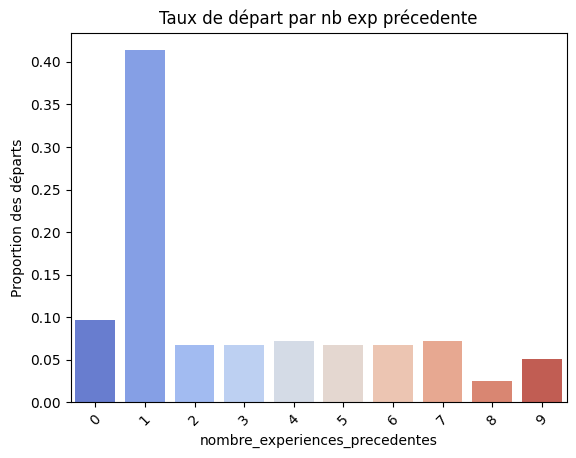

In [859]:
depart_counts = df.groupby('nombre_experiences_precedentes')['a_quitte_l_entreprise'].sum()

part_depart = depart_counts / depart_counts.sum()

sns.barplot(x=part_depart.index, y=part_depart.values, palette='coolwarm')
plt.title("Taux de départ par nb exp précedente")
plt.ylabel("Proportion des départs")
plt.xticks(rotation=45)
plt.show()

> **Interprétation :**  
> Parmi tous ceux qui ont quitté l’entreprise, quelle proportion en fonction nb exp precedente ?

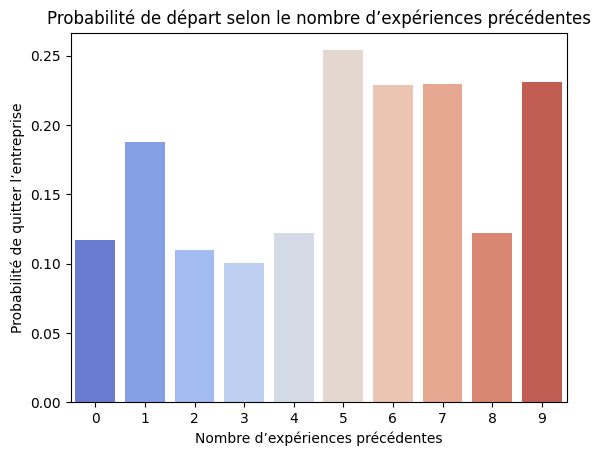

In [860]:
proba_depart_exp = (
    df.groupby('nombre_experiences_precedentes')['a_quitte_l_entreprise']
      .mean() 
)

sns.barplot(x=proba_depart_exp.index, y=proba_depart_exp.values, palette='coolwarm')
plt.title("Probabilité de départ selon le nombre d’expériences précédentes")
plt.ylabel("Probabilité de quitter l’entreprise")
plt.xlabel("Nombre d’expériences précédentes")
plt.show()

> **Interprétation :**  
> Si je prends un employé en fonction nb exp précedente, quelle est la probabilité qu’il ait quitté l’entreprise ?

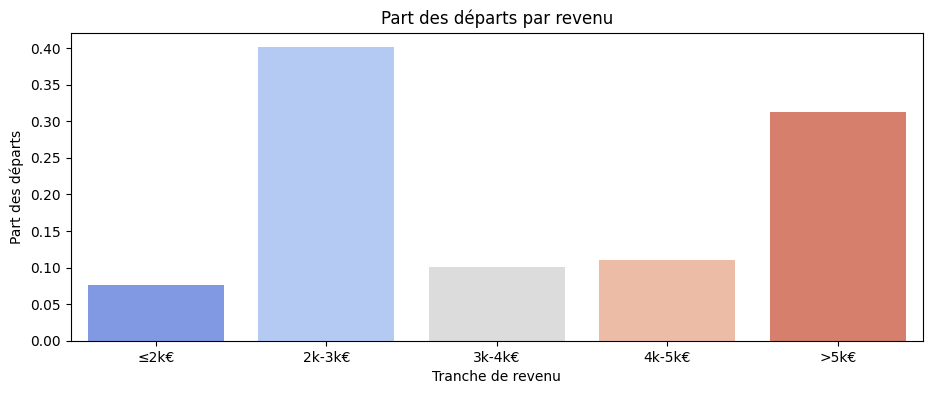

In [861]:
bins   = [0, 2000, 3000, 4000, 5000, np.inf]
labels = ['≤2k€', '2k-3k€', '3k-4k€', '4k-5k€', '>5k€']

df['tranche_revenu'] = pd.cut(
    df['revenu_mensuel'],
    bins=bins, labels=labels,
    include_lowest=True, right=True
)

departs_par_tranche = (
    df.groupby('tranche_revenu')['a_quitte_l_entreprise']
      .sum()
)

part_des_departs = departs_par_tranche / departs_par_tranche.sum()


plt.figure(figsize=(11,4))
sns.barplot(x=part_des_departs.index, y=part_des_departs.values, palette='coolwarm')
plt.title("Part des départs par revenu")
plt.ylabel("Part des départs")
plt.xlabel("Tranche de revenu")
plt.show()

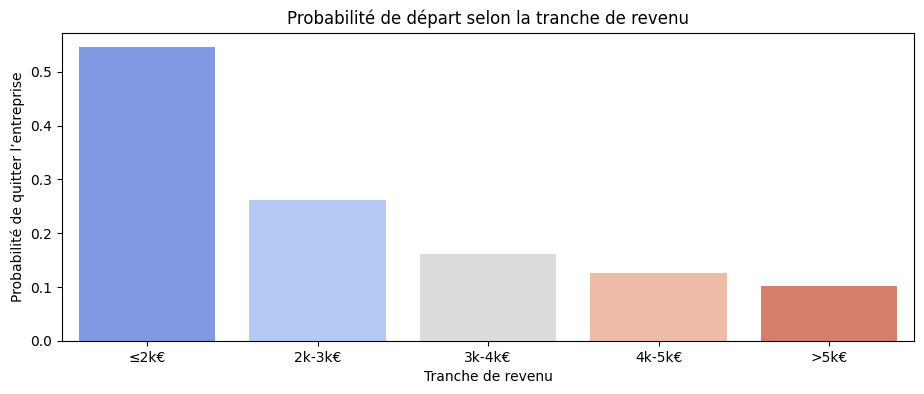

In [862]:
bins   = [0, 2000, 3000, 4000, 5000, np.inf]
labels = ['≤2k€', '2k-3k€', '3k-4k€', '4k-5k€', '>5k€']

df['tranche_revenu'] = pd.cut(
    df['revenu_mensuel'],
    bins=bins, labels=labels,
    include_lowest=True, right=True
)

proba_depart_revenu = (
    df.groupby('tranche_revenu')['a_quitte_l_entreprise']
      .mean()  
)

plt.figure(figsize=(11,4))
sns.barplot(x=proba_depart_revenu.index, y=proba_depart_revenu.values, palette='coolwarm')
plt.title("Probabilité de départ selon la tranche de revenu")
plt.ylabel("Probabilité de quitter l’entreprise")
plt.xlabel("Tranche de revenu")
plt.show()


In [863]:
joblib.dump(df, "df.joblib")


['df.joblib']